In [1]:
# Given the dataset full_data_flightdelay.csv,
# the task is to predict whether the delay of a flight will be larger than 15 minutes.
# The data set contains the following columns:
# MONTH:				Month
# DAY_OF_WEEK:			Day of Week
# DEP_DEL15: 			TARGET Binary of a departure delay over 15 minutes (1 is yes)
# DEP_TIME_BLK:			Departure time block
# DISTANCE_GROUP:			Distance group to be flown by departing aircraft
# SEGMENT_NUMBER:			The segment that this tail number is on for the day
# CONCURRENT_FLIGHTS:		Concurrent flights leaving from the airport in the same departure block
# NUMBER_OF_SEATS:		Number of seats on the aircraft
# CARRIER_NAME:			Carrier
# AIRPORT_FLIGHTS_MONTH:		Avg Airport Flights per Month
# AIRLINE_FLIGHTS_MONTH:		Avg Airline Flights per Month
# AIRLINE_AIRPORT_FLIGHTS_MONTH:	Avg Flights per month for Airline AND Airport
# AVG_MONTHLY_PASS_AIRPORT:	Avg Passengers for the departing airport for the month
# AVG_MONTHLY_PASS_AIRLINE:	Avg Passengers for airline for month
# FLT_ATTENDANTS_PER_PASS:	Flight attendants per passenger for airline
# GROUND_SERV_PER_PASS:		Ground service employees (service desk) per passenger for airline
# PLANE_AGE:			Age of departing aircraft
# DEPARTING_AIRPORT:		Departing Airport
# LATITUDE:			Latitude of departing airport
# LONGITUDE:			Longitude of departing airport
# PREVIOUS_AIRPORT:		Previous airport that aircraft departed from
# PRCP:				Inches of precipitation for day
# SNOW:				Inches of snowfall for day
# SNWD:				Inches of snow on ground for day
# TMAX:				Max temperature for day
# AWND:				Max wind speed for day
#
# Final input datapoints provided by the user will consist of:
# MONTH, DAY_OF_WEEK, DEP_TIME_BLK, DISTANCE_GROUP, CARRIER_NAME, DEPARTING_AIRPORT, PRCP, SNOW
# PRCP and SNOW will be converted into [0,1] values indicating wheter there is rainfall or snowfall at all.
# DISTANCE_GROUP will be changed to SHORT_FLIGHT[0,1] to indicate whether this was a shor flight or not.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the path to the dataset
path = '../../full_data_flightdelay.csv'

In [3]:
# importing and checking the dataset
df = pd.read_csv(path)
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [4]:
# deleting unwanted columns
columns_to_delete = ['SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
                     'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
                     'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'LATITUDE', 'LONGITUDE', 'PREVIOUS_AIRPORT', 'SNWD', 'TMAX', 'AWND']

df.drop(columns=columns_to_delete, inplace=True)
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CARRIER_NAME,DEPARTING_AIRPORT,PRCP,SNOW
0,1,7,0,0800-0859,2,Southwest Airlines Co.,McCarran International,0.0,0.0
1,1,7,0,0700-0759,7,Delta Air Lines Inc.,McCarran International,0.0,0.0
2,1,7,0,0600-0659,7,Delta Air Lines Inc.,McCarran International,0.0,0.0
3,1,7,0,0600-0659,9,Delta Air Lines Inc.,McCarran International,0.0,0.0
4,1,7,0,0001-0559,7,Spirit Air Lines,McCarran International,0.0,0.0


In [5]:
# encode the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mapping_dict = {}

def clean_labels_encoder(list_of_labels, df):
    for label in list_of_labels:
        df[label] = le.fit_transform(df[label]).astype(np.int16)
        mapping_dict[label] = dict(zip(le.classes_, le.transform(le.classes_)))
    return df

# clean the labels
list_of_labels = ['DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT']
df = clean_labels_encoder(list_of_labels, df)

# print old, unique values for each column, and their corresponding new values
for label, mapping in mapping_dict.items():
    print(f"Column: {label}")
    print(mapping)

# show head of the dataset
df.head()

Column: DEP_TIME_BLK
{'0001-0559': 0, '0600-0659': 1, '0700-0759': 2, '0800-0859': 3, '0900-0959': 4, '1000-1059': 5, '1100-1159': 6, '1200-1259': 7, '1300-1359': 8, '1400-1459': 9, '1500-1559': 10, '1600-1659': 11, '1700-1759': 12, '1800-1859': 13, '1900-1959': 14, '2000-2059': 15, '2100-2159': 16, '2200-2259': 17, '2300-2359': 18}
Column: CARRIER_NAME
{'Alaska Airlines Inc.': 0, 'Allegiant Air': 1, 'American Airlines Inc.': 2, 'American Eagle Airlines Inc.': 3, 'Atlantic Southeast Airlines': 4, 'Comair Inc.': 5, 'Delta Air Lines Inc.': 6, 'Endeavor Air Inc.': 7, 'Frontier Airlines Inc.': 8, 'Hawaiian Airlines Inc.': 9, 'JetBlue Airways': 10, 'Mesa Airlines Inc.': 11, 'Midwest Airline, Inc.': 12, 'SkyWest Airlines Inc.': 13, 'Southwest Airlines Co.': 14, 'Spirit Air Lines': 15, 'United Air Lines Inc.': 16}
Column: DEPARTING_AIRPORT
{'Adams Field': 0, 'Albany International': 1, 'Albuquerque International Sunport': 2, 'Anchorage International': 3, 'Atlanta Municipal': 4, 'Austin - Bergs

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CARRIER_NAME,DEPARTING_AIRPORT,PRCP,SNOW
0,1,7,0,3,2,14,44,0.0,0.0
1,1,7,0,2,7,6,44,0.0,0.0
2,1,7,0,1,7,6,44,0.0,0.0
3,1,7,0,1,9,6,44,0.0,0.0
4,1,7,0,0,7,15,44,0.0,0.0


In [6]:
# fill the missing values with mean
df.fillna(df.mean(), inplace=True)

In [7]:
# Replace detailed data with categorical columns to indicate a short flight, rainy conditions and snowy contitions.
df['SHORT_FLIGHT'] = (df['DISTANCE_GROUP'] <= 3).astype(np.int16)
df['RAINS'] = (df['PRCP'] > 0).astype(np.int16)
df['SNOWS'] = (df['SNOW'] > 0).astype(np.int16)
columns_to_delete = ['DISTANCE_GROUP', 'PRCP', 'SNOW']
df.drop(columns=columns_to_delete, inplace=True)

#Change the datatype of the remaining columns to int16
df['MONTH'] = (df['MONTH']).astype(np.int16)
df['DAY_OF_WEEK'] = (df['DAY_OF_WEEK']).astype(np.int16)
df['DEP_DEL15'] = (df['DEP_DEL15']).astype(np.int16)

df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,CARRIER_NAME,DEPARTING_AIRPORT,SHORT_FLIGHT,RAINS,SNOWS
0,1,7,0,3,14,44,1,0,0
1,1,7,0,2,6,44,0,0,0
2,1,7,0,1,6,44,0,0,0
3,1,7,0,1,6,44,0,0,0
4,1,7,0,0,15,44,0,0,0


In [8]:
# Verify column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 9 columns):
 #   Column             Dtype
---  ------             -----
 0   MONTH              int16
 1   DAY_OF_WEEK        int16
 2   DEP_DEL15          int16
 3   DEP_TIME_BLK       int16
 4   CARRIER_NAME       int16
 5   DEPARTING_AIRPORT  int16
 6   SHORT_FLIGHT       int16
 7   RAINS              int16
 8   SNOWS              int16
dtypes: int16(9)
memory usage: 111.4 MB


In [9]:
# Shuffle the rows
df = df.sample(frac=1, random_state=42)

# Reset the index after shuffling
df.reset_index(drop=True, inplace=True)

df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,CARRIER_NAME,DEPARTING_AIRPORT,SHORT_FLIGHT,RAINS,SNOWS
0,3,5,0,10,12,73,1,0,0
1,9,7,0,17,2,48,0,0,0
2,12,1,0,14,7,69,1,0,0
3,8,3,0,12,16,52,0,1,0
4,9,5,0,3,11,92,1,0,0


In [10]:
# Check class impabance fo weighted loss function
df['DEP_DEL15'].value_counts()

DEP_DEL15
0    5261694
1    1227368
Name: count, dtype: int64

In [11]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
# Define the input and target variables
X = df.drop(columns=['DEP_DEL15'])
y = df['DEP_DEL15']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Scale the data using a MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_model():
    model = Sequential()
    model.add(keras.Input(shape=(X_train.shape[1],)))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    optimizer = keras.optimizers.Adam(
    learning_rate=0.0001,
    weight_decay = 0.01)
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', keras.metrics.Precision(), keras.metrics.AUC(),
                                                                         keras.metrics.Recall()])
    return model

model = create_model()

# Create callback for early stopping
callback = EarlyStopping(
    monitor="val_loss",
    patience=10,
    mode="min",
    restore_best_weights=True,
)

# Train the model
class_weight = {0: 1.,
                1: 3.}
history = model.fit(X_train, y_train, epochs=120, batch_size=128, validation_split=0.2,
                    verbose=1, class_weight=class_weight, callbacks=[callback])

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test AUC_ROC:', score[3])
print('Test recall:', score[4])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 862,465 (3.29 MB)

 Trainable params: 862,465 (3.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120
32446/32446 ━━━━━━━━━━━━━━━━━━━━ 152s 5ms/step - accuracy: 0.7382 - auc: 0.6515 - loss: 0.8849 - precision: 0.3175 - recall: 0.3354 - val_accuracy: 0.7325 - val_auc: 0.6646 - val_loss: 0.5490 - val_precision: 0.3240 - val_recall: 0.3821
Epoch 2/120
32446/32446 ━━━━━━━━━━━━━━━━━━━━ 150s 5ms/step - accuracy: 0.7325 - auc: 0.6676 - loss: 0.8736 - precision: 0.3266 - recall: 0.3911 - val_accuracy: 0.7484 - val_auc: 0.6701 - val_loss: 0.5476 - val_precision: 0.3399 - val_recall: 0.3510
Epoch 3/120
32446/32446 ━━━━━━━━━━━━━━━━━━━━ 148s 5ms/step - accuracy: 0.7325 - auc: 0.6733 - loss: 0.8699 - precision: 0.3306 - recall: 0.4028 - val_accuracy: 0.7311 - val_auc: 0.6729 - val_loss: 0.5620 - val_precision: 0.3286 - val_recall: 0.4052
Epoch 4/120
32446/32446 ━━━━━━━━━━━━━━━━━━━━ 147s 5ms/step - accuracy: 0.7342 - auc: 0.6775 - loss: 0.8664 - precision: 0.3348 - recall: 0.4097 - val_accuracy: 0.7337 - val_auc: 0.6787 - val_loss: 0.5577 - val_precision: 0.3347 - val_recall: 0.4136
Epoc

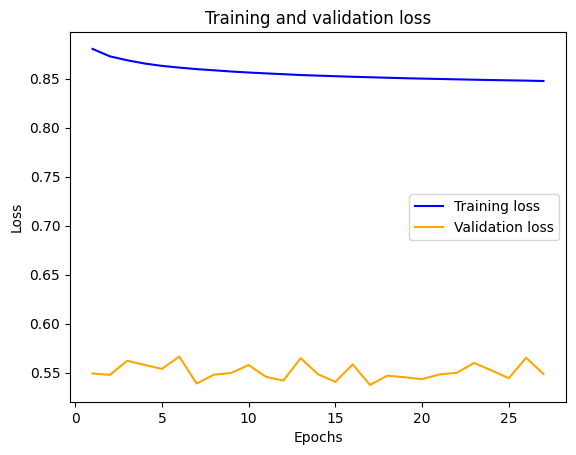

In [13]:
#Plotting training and validation losses based on epochs

history_dict = history.history

# loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

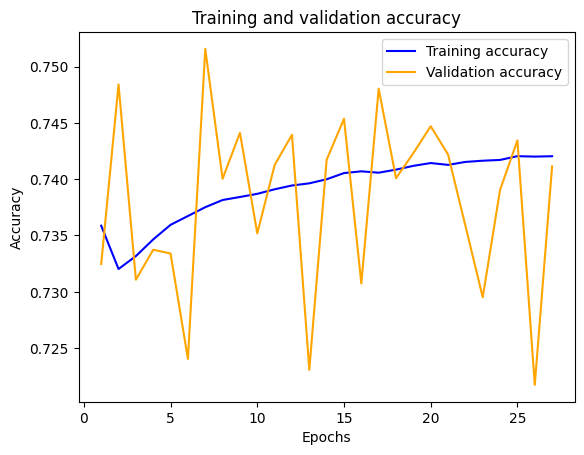

In [14]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'blue', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
import joblib

# Save the ML model
model.save("./utils/test_prediction_model.keras")

# Save th scaler
joblib.dump(scaler, './utils/scaler.pkl')

['./utils/scaler.pkl']